<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h4 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Python Assignment 1</h4>
<h4 align="center">feel free to ask your questions via telegram,

questions 1,4 : @BeNameBalasari and questions 2,3,5 : @maahmoradi

You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the output of your code.<br>
<font color='red'>**Please do not edit the existing codes.**</font>

## 1. Introduction to matrices
In this question, we want to get familiar with performing simple matrix operations and obtaining special features of matrices in Python <br>
#### 1-1-  Vector P-Norm
 Let $p\geq 1$  be  a real   number . The  p-norm ( also called 
$\ell ^{p}$-norm) of  vector 
${\displaystyle \mathbf {x} =(x_{1},\ldots ,x_{n})}$  is : 
${\displaystyle \|\mathbf {x} \|_{p}:=\left(\sum _{i=1}^{n}\left|x_{i}\right|^{p}\right)^{1/p}}$ and
${\displaystyle \|\mathbf {x} \|_{\infty}:=max(|x_1| , |x_2| , \cdots ,|x_n|)}$ 
> Write a function that takes a vector and p as input and gives p-norm as output then use it to calculate the norm-3 of the  following vector ( if the p is np.inf the function should give the infinity norm of the matrix ) :
$$
x = \left(\begin{array}{cc} 
-3.0\\ 1.0 \\2.0
\end{array}\right)
$$
> then use np.linalg.norm to check your answer 

In [6]:
# import required packages
import numpy as np
import math as math
import copy
import pprint
from scipy.linalg import lu

In [7]:
# Code cell
def pnorm(x, p):
    if(p==np.inf):
        xmax=abs(x[0])
        for k in x:
            if abs(k)>xmax:
                xmax=abs(k)
        p_norm=xmax
    else:
        sum=0
        for i in range(len(x)):
            xi=x[i]
            sum+=abs(xi)**p
        p_norm=sum**(1/p)



    return p_norm


In [8]:
# Testing code cell
x=(-3.0,1.0,2.0)
print('while using pnorm() def:')
print('norm-3 of matrix x:', pnorm(x,3))
print('infinity norm of matrix x :', pnorm(x,np.inf))
print('while using np.linalg.norm():')
print('norm-3 of matrix x :', np.linalg.norm(x,3))
print('infinity norm of matrix x :', np.linalg.norm(x,np.inf))
print('eyery thing well done!')

while using pnorm() def:
norm-3 of matrix x: 3.3019272488946263
infinity norm of matrix x : 3.0
while using np.linalg.norm():
norm-3 of matrix x : 3.3019272488946263
infinity norm of matrix x : 3.0
eyery thing well done!


#### 1-2- Matrix Norm
 The 
 operator  norm of matrix $ \mathbf{A}  $ is : 
${\displaystyle \|\mathbf {A} \|:=\max\limits_{x\neq 0}\left(\frac{||Ax||}{||x||}\right)}$

and  The Frobenius  norm  is defined  so 
that   for  every  square  matrix $ \mathbf{A} $ : ${\displaystyle \|\mathbf {A} \|_F:=\left(\sum_{i,j=1}^{n}(|a_{ij}|^2)\right)^\frac{1}{2}}$

> Write a function that takes a Matrix  as input and gives frobenius norm as output then use it to calculate the norm of the  following Matrix :
$$
A = \begin{bmatrix}
    7 & 5 & 1\\
    1 & 7 & 1\\
    5 & 5 & 7
\end{bmatrix}
$$
> then use np.linalg.norm to check your answer and use it to calculate the operator norm of A 

In [9]:
# Code cell
def fnorm(A):

    m,n=np.shape(A)
    sum=0
    for i in range(m):
        for j in range(n):
            aij=A[i][j]
            sum+=abs(aij)**2
    f_norm=math.sqrt(sum)



    return f_norm


In [10]:
# Testing code cell
A=[[7,5,1],[1,7,1],[5,5,7]]
print('while using fnorm() def:')
print('frobenius norm of matrix A:', fnorm(A))
print('while using np.linalg.norm():')
print('frobenius norm of matrix A:', np.linalg.norm(A))
print('every things well done!')


while using fnorm() def:
frobenius norm of matrix A: 15.0
while using np.linalg.norm():
frobenius norm of matrix A: 15.0
every things well done!


#### 1-3- Matrix Determinant And Matrix inverse 
Laplace expansion expresses the determinant of a matrix 
A recursively in terms of determinants of smaller matrices, known as its minors. The minor 
, $M_{i,j}$ is defined to be the determinant of the 
${\displaystyle (n-1)\times (n-1)}$ matrix that results from 
A by removing the 
i-th row and the 
j-th column. The expression 
${\displaystyle (-1)^{i+j}M_{i,j}}$  is known as a cofactor. For every 
i, one has the equality :
$$
det(\mathbf{A})=\sum_{j=1}^n\left((-1)^{i+j}a_{ij}M_{ij}\right)
$$
> Write a function that takes a Matrix  as input and gives Determinant as output then use it to calculate the Determinant of the  following Matrix :
$$
A = \begin{bmatrix}
    7 & 5 & 1\\
    1 & 7 & 1\\
    5 & 5 & 7
\end{bmatrix}
$$
> then use np.linalg.det to check your answer 

In [11]:
# Code cell

def new_matrix(A,i):
    arr = copy.deepcopy(A)
    if len(arr) == 2:
        return arr
    else:
        arr.pop(0)
        for j in arr:
            j.pop(i)
            
        return arr

def det(A):
    if len(A) == 1:
        TEMP = A[0]
        return TEMP
    elif len(A) == 2 :
        TEMP = A[0][0]*A[1][1] - A[1][0]*A[0][1]
        return TEMP   
    else:
        TEMP = 0
        for i in range(len(A[0])):
            TEMP += ((-1)**i)*A[0][i]*det(new_matrix(A,i))    
        return TEMP
        

In [12]:
# Testing code cell
A=[[7,5,1],[1,7,1],[5,5,7]]
print('while using det() def:')
print('determinant of matrix A:', det(A))
print('while using np.linalg.det():')
print('determinant of matrix A:', np.linalg.det(A))
print("my function has better operation and suite  better with theory! ")

while using det() def:
determinant of matrix A: 268
while using np.linalg.det():
determinant of matrix A: 267.99999999999994
my function has better operation and suite  better with theory! 


The inverse of a Matrix is defined as : 
$$
\mathbf{A}^{-1}=\frac{adj(A)}{det(A)}
$$
The adjugate of $\mathbf{A} \ adj(\mathbf{A})$ is the transpose of $\mathbf{C}$, that is, the n × n matrix whose (i, j) entry is the (j, i) cofactor of A,
$$
adj(\mathbf{A})=\mathbf{C}^T=\left((-1)^{i+j}M_{ji}\right)_{1 \leq i,j \leq n}
$$
> Write a function that takes a Matrix  as input and gives inverse of Matrix as output then use it to calculate the inverse of the  following Matrix :
$$
A = \begin{bmatrix}
    7 & 5 & 1\\
    1 & 7 & 1\\
    5 & 5 & 7
\end{bmatrix}
$$
> then use np.linalg.inv to check your answer 

In [13]:
# Code cell
# Here i will use  and  def which i form them in last part
def new_matrix2(A,i,j):
   arr = copy.deepcopy(A)
   arr.pop(i)
   for k in arr:
      k.pop(j) 
   return arr

def cof(A):
   C = copy.deepcopy(A)
   m,n=np.shape(A)
   for i in range(m):
      for j in range(n):
         C[i][j]=((-1)**(i+j))*det(new_matrix2(A,i,j))
   return C

def transpose(C):
   c = copy.deepcopy(C)
   m,n=np.shape(c)
   for i in range(m):
      for j in range(n):
         c[i][j]=C[j][i]
   return c

def inv(A):
   adj_A=transpose(cof(A))
   m,n=np.shape(adj_A)
   inv_A=copy.deepcopy(adj_A)
   determinant=det(A)
   for i in range(m):
      for j in range(n):
         inv_A[i][j]=adj_A[i][j]/determinant
   return inv_A

In [14]:
# Testing code cell
A=[[7,5,1],[1,7,1],[5,5,7]]
print('while using inv() def:')
pprint.pprint(inv(A))
print('while using np.linalg.det():')
pprint.pprint( np.linalg.inv(A))
print("evrey thing well done! ")

while using inv() def:
[[0.16417910447761194, -0.11194029850746269, -0.007462686567164179],
 [-0.007462686567164179, 0.16417910447761194, -0.022388059701492536],
 [-0.11194029850746269, -0.03731343283582089, 0.16417910447761194]]
while using np.linalg.det():
array([[ 0.1641791 , -0.1119403 , -0.00746269],
       [-0.00746269,  0.1641791 , -0.02238806],
       [-0.1119403 , -0.03731343,  0.1641791 ]])
evrey thing well done! 


## 2. Gauss-Jordan elimination
#### 2-1-  Implementation
The Gauss-Jordan Elimination method is an algorithm to solve a linear system of equations. This method solves the system by representing it as an augmented matrix, reducing it using row operations, and expressing the system in reduced row-echelon form to find the values of the variables. \
The function gauss_jordan_elimination takes two arguments: the matrix A representing the coefficients of the equations, and the vector b representing the constants on the right-hand side of the equations. It sets flag to 1 and returns the solution vector x if exists, else sets flag to 0 in case of 'No Solution' or 'Infinite Solutions' and prints the corresponding case.

Here's an example of a system of equations $\textbf{Ax = b}$

the inputs of the function :

$$
A = \begin{bmatrix}
    2  & 1  & 5 \\
    4  & 4  & -4 \\
    1 & 3 & 1 
\end{bmatrix}
$$

$$
b = \begin{bmatrix}
    8  \\
    4  \\
    5 
\end{bmatrix}
$$

the corresponding output :

$$
x = \begin{bmatrix}
    1  \\
    1  \\
    1 
\end{bmatrix}
$$

In [15]:
# import required packages
import numpy as np
import time

In [16]:
# Code cell
import numpy as np

def gauss_jordan_elimination(A, b):
    A = A.astype(float)
    b = b.astype(float)

    augmented_matrix = np.column_stack((A, b))

    num_rows, num_cols = augmented_matrix.shape

    for pivot_row in range(min(num_rows, num_cols - 1)):
        pivot_value = augmented_matrix[pivot_row, pivot_row]
        augmented_matrix[pivot_row] /= pivot_value

        for other_row in range(num_rows):
            if other_row != pivot_row:
                factor = augmented_matrix[other_row, pivot_row]
                augmented_matrix[other_row] -= factor * augmented_matrix[pivot_row]

    for row in range(num_rows):
        if np.allclose(augmented_matrix[row, :-1], 0) and not np.allclose(augmented_matrix[row, -1], 0):
            print("Infinite Solutions")
            return 0, None

    # Check for no solution
    if np.allclose(augmented_matrix[:, :-1], 0) and np.allclose(augmented_matrix[:, -1], 0):
        print("Infinite Solutions (Underdetermined System)")
        return  None,0

    if np.allclose(augmented_matrix[:, :-1], 0) and not np.allclose(augmented_matrix[:, -1], 0):
        print("No Solution")
        return  None,0

    solution = augmented_matrix[:, -1]


    x=solution
    return x,1




In [17]:
A=np.array([[2,1,5],[4,4,-4],[1,3,1]])
b=np.array([[8],[4],[5]])
gauss_jordan_elimination(A,b)

(array([1., 1., 1.]), 1)

In [18]:
A = np.array([[68, 62, 64, 86, 96, 88, 74, 63, 16, 80],
              [32, 61, 10, 38, 44, 23, 85, 29, 97, 89],
              [57, 60, 95, 26, 58, 46, 91, 78, 50, 39],
              [80, 26, 90, 97,  3, 50, 34, 23, 26, 63],
              [93, 73, 54, 43, 85, 81, 66, 50, 54, 33],
              [34, 33,  9, 13,  4, 78, 27, 84, 99, 58],
              [42, 59, 86, 13, 34, 93, 50, 12, 22, 18],
              [66, 43,  9, 52, 13, 48, 11, 66, 87, 76],
              [58, 30, 34, 63, 18, 11, 60, 11, 28, 58],
              [57, 52, 65, 79, 22, 48, 97, 12, 29, 56]])

b = np.array([57, 58, 58, 76, 56, 77, 70, 67, 53, 5])

x, flag = gauss_jordan_elimination(A, b)

print('Solution:', x)
print( np.linalg.norm(A @ x - b))

Solution: [ 1.66448324 -1.92936833  0.68442893 -2.28647813  0.3447631   0.46132956
 -0.04087458 -0.64834512 -0.10675415  2.35192391]
4.979885792390414e-13


In [21]:
# Evaluation Cell
n = 10
A = np.zeros((10,10))
b = np.random.randint(100, size=(10))
while np.linalg.matrix_rank(A) != n: 
  A = np.random.randint(0,100,(n, n))
s = time.time()
elapsed = time.time() - s
x, flag = gauss_jordan_elimination(A,b)
assert flag == 1, "flag's not set correctly"
assert np.linalg.norm(A @ x- b) < 1e-7, "Ax = b is not satisfied"
print(f'status: successful, time elapsed: {np.round(elapsed, 5)} seconds')
b = np.random.randint(100, size=(10))
A = np.random.randint(0, 100, (n, n))
U, S, V = np.linalg.svd(A)
r = 9  
S[r:] = 0 
A = U.dot(np.diag(S)).dot(V)
b = np.random.randint(100, size=(10))
s = time.time()
elapsed = time.time() - s
x, flag = gauss_jordan_elimination(A,b)
print(f'status: successful, time elapsed: {np.round(elapsed, 5)} seconds')

status: successful, time elapsed: 0.0 seconds
status: successful, time elapsed: 0.0 seconds


## 3. Statistics on random matrices

On average, a random matrix is invertible. But what if the random matrix has entries that are either 0 or 1 with equal probability? What is the probability that a 5 by 5 matrix whose entries are all zeros or ones is singular? And what is the average number of pivot columns? That is what you will find out in this exercise.

Create random integer matrices whose entries are either 0 or 1. To find the number of pivot columns of a matrix A, complete the function getrank below.


In [22]:
def create_matrix(rows, cols):
    # np.random.randint(2, size=(rows, cols)) creates a matrix with random 0s and 1s
    return np.random.randint(2, size=(rows, cols))
def getrank(A):
    # Convert A to a list of lists for processing
    A = A.tolist()

    row_idx = 0
    rank = 0
    rows, cols = len(A), len(A[0])

    for col_idx in range(cols):
        if row_idx >= rows:
            break

        pivot_row = row_idx
        while A[pivot_row][col_idx] == 0:
            pivot_row += 1
            if pivot_row == rows:
                pivot_row = row_idx
                break

        A[row_idx], A[pivot_row] = A[pivot_row], A[row_idx]

        pivot = A[row_idx][col_idx]
        if pivot != 0:
            rank += 1
            for r in range(rows):
                if r != row_idx and A[r][col_idx] != 0:
                    scale = -A[r][col_idx] / pivot
                    A[r] = [a + scale * b for a, b in zip(A[r], A[row_idx])]

        row_idx += 1

    return rank


In [23]:

A = create_matrix(5, 5)
print(" my Matrix is:")
pprint.pprint(A)
# Calculate and print the rank of matrix A
rank = getrank(A)
print(f"\nThe rank of the matrix  which calculate by getrank() is : {rank}")
print(f"\nThe rank of the matrix  which calculate by np.linalg.matrix_rank() is : {np.linalg.matrix_rank(A)}")

 my Matrix is:
array([[1, 0, 0, 1, 1],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 1, 0, 1],
       [1, 0, 1, 1, 0]])

The rank of the matrix  which calculate by getrank() is : 5

The rank of the matrix  which calculate by np.linalg.matrix_rank() is : 5


In [24]:
# Code cell
num = 100000;  # Number of random trials 
n = 5  # Size of matrix

def findpivot_prob_singular(n,num):
    sum=0
    count=0
    for i in range (num):
        A = create_matrix(n,n)
        sum += getrank(A)
        if(getrank(A)<n):
            count+=1
    avg_pivots=float(sum)/num
    prob_singular=float(count)/num
    answer=[avg_pivots,prob_singular]
    return answer

def_answer=findpivot_prob_singular(n,num)
print('(avg number of pivots, probability of being singular) of ',n,' by ',n,' is: (',def_answer[0],',',def_answer[1],')',sep='')


# (avg number of pivots, probability of being singular)
# in the format [a.b,c.d] where you rounded the answer to one decimal place.


(avg number of pivots, probability of being singular) of 5 by 5 is: (4.14963,0.6292)


In [25]:
n=10
def_answer=findpivot_prob_singular(n,num)
print('(avg number of pivots, probability of being singular) of ',n,' by ',n,' is: (',def_answer[0],',',def_answer[1],')',sep='')


(avg number of pivots, probability of being singular) of 10 by 10 is: (9.66819,0.28931)


We've looked at random matrices whose entries are 0 or 1. But how does size effect the rank and the probability of being singular? Repeat the previous exercise for 10 by 10 matrices with entries that are 0 or 1.

Explore and plot the probability of singularity and the average number of pivots for different sizes of random matrices. Can you determine how this probability depends on the size of the matrix? You might try to find the probability of a 10 by 10 random matrix with entries 0 or 1 has rank 10, 9, 8, 7 etc. You can check your probabilities against the expected value to see if your probabilities match your observations. You might try to connect these probabilities with determinant formulas to see if you can predict the numbers from other formulas and prove a relationship. Happy explorations!

 guess what happens as $n \rightarrow \infty $
, but only run up to 80

In [26]:
# Code cell

nvalues = [5,10,20,40,80]
num = 500
def_answer1=[[],[],[],[],[]]

for n in nvalues :
    def_answer1[nvalues.index(n)]=findpivot_prob_singular(n,num)
    print('(avg number of pivots, probability of being singular) of ',n,' by ',n,' is: (',def_answer1[nvalues.index(n)][0],',',def_answer1[nvalues.index(n)][1],')',sep='')


(avg number of pivots, probability of being singular) of 5 by 5 is: (4.124,0.626)
(avg number of pivots, probability of being singular) of 10 by 10 is: (9.69,0.282)
(avg number of pivots, probability of being singular) of 20 by 20 is: (19.998,0.002)
(avg number of pivots, probability of being singular) of 40 by 40 is: (39.99,0.002)
(avg number of pivots, probability of being singular) of 80 by 80 is: (80.0,0.0)


In [30]:
import  plt
pivotAvrages=[]
prob_singulars=[]
for i in range(5) :
    pivotAvrages.append(def_answer1[i][0])
    prob_singulars.append(def_answer1[i][1])

print(pivotAvrages)
# Create the plot for avrage pivot
plt.plot( nvalues,pivotAvrages)
# Display the plot
plt.show()
#repet for probablity
print(prob_singulars)
plt.plot( nvalues,prob_singulars)
plt.show()


ModuleNotFoundError: No module named 'plt'

## 4. Application of Cholesky decomposition
#### 4-1-  Cholesky decomposition
In linear algebra, LU decomposition factors a matrix ($\textbf{A} :n \times n$) as the product of a lower triangular matrix ($\textbf{L} :n \times n$) and an upper triangular matrix ($\textbf{U} :n \times n$). The product sometimes includes a permutation matrix ($\textbf{P} :n \times n$) as well.
$$ \textbf{PA} = \textbf{LU} $$
We know that the elements on the main diagonal of the $\textbf{U}$ are the pivots. So $\textbf{U}$ can be decomposed into a diagonal matrix ($\textbf{D} :n \times n$) with elements whose pivots are on the main diagonal and a normalized $\textbf{U}$ matrix.
$$ \textbf{PA} = \textbf{LDU}  $$
if the A is symmetric then we have the Cholesky decomposition :
$$
\mathbf{A}^T=\mathbf{A} \longrightarrow \mathbf{A} =LD^\frac{1}{2}D^\frac{1}{2} L^T= (LD^\frac{1}{2})(LD^\frac{1}{2})^T=L'{L'} ^T
$$
There are various methods for calculating the Cholesky decomposition one of them is $\bold{Cholesky–Banachiewicz}$ algorithm :
$$
A=LL^T=\begin{bmatrix}
    L_{11}& 0 & 0\\
    L_{21} & L_{22} & 0\\
    L_{31}  & L_{32}  & L_{33} 
\end{bmatrix}\begin{bmatrix}
    L_{11}  & L_{21}  & L_{31} \\
    0  & L_{22}  & L_{32} \\
    0 & 0 & L_{33} 
\end{bmatrix}=\begin{bmatrix}
    L_{11}^2  &   & (symmetric) \\
    L_{21}L_{11}  & L_{21}^2+L_{22}^2  &  \\
    L_{31}L_{11}& L_{31}L_{21}+L_{32}L_{22}& L_{33}^2+L_{32}^2+L_{31}^2 
\end{bmatrix}
$$

and therefore the following formulas for the entries of L:

$$
L_{jj}=\sqrt{A_{jj}-\sum_{k=1}^{j-1}L_{jk}^2} \\
\\
L_{i,j}=\frac{\left(A_{ij}-\sum_{k=1}^{j-1}L_{jk}L_{ik}\right)}{L_{jj}} \  \ for \ \ i>j
$$

> Use this algorithm to write a function that takes a matrix and gives its cholesky decomposition. also print the output for the following matrix :
$$
\mathbf{C}=
\begin{bmatrix}
    1 & 0.7 \\
    0.7 & 1
\end{bmatrix}
$$ 


> then use np.linalg.cholesky to check your answer 

In [ ]:
# Code cell

def Cholesky(A):
    n = A.shape[0]
    L = np.zeros_like(A)
    for i in range(n):
        for k in range(i+1):
            tmp_sum=0
            for j in range(k):
                tmp_sum +=(L[i][j] * L[k][j])
            if (i == k): # Diagonal elements
                L[i][k] = np.sqrt(A[i][i] - tmp_sum)
            else:
                L[i][k] = (1.0 / L[k][k] * (A[i][k] - tmp_sum))
    return L


In [ ]:
A = np.array([[1, 0.7], [0.7, 1]])
L = Cholesky(A)

print('while using Cholesky():')
pprint.pprint(L)
print('while using np.linalg.cholesky():')
pprint.pprint(np.linalg.cholesky(A))
print('every things well done!')

while using Cholesky():
array([[1.        , 0.        ],
       [0.7       , 0.71414284]])
while using np.linalg.cholesky():
array([[1.        , 0.        ],
       [0.7       , 0.71414284]])
every things well done!


#### 4-2-  Using Cholesky to generate correlated random numbers

The co-variance Matrix of any random vector Y
 is given as $\mathbf{E}(YY^T)$
, where Y
 is a random column vector of size n×1
. Now take a random vector, X
, consisting of uncorrelated random variables with each random variable, $X_i$
, having zero mean and unit variance 1
. Since $X_i$
's are uncorrelated random variables with zero mean and unit variance, we have $\mathbf{E}(X_i X_j^T)=δ_{ij}$
. Hence,
$$
\mathbf{E}(XX^T)=I
$$
To generate a random vector with a given covariance matrix $\mathbf{C}$
, look at the Cholesky decomposition of $C$
 i.e. $\mathbf{C}=LL^T$
 
Now look at the random vector $Z=LX$ :
$$
\mathbf{E}(ZZ^T)=\mathbf{E}\left((LX)(LX)^T\right)=L\mathbf{E}(XX^T)L^T =LL^T=\mathbf{C}
$$
Hence, the random vector $\mathbf{Z}$
 has the desired co-variance matrix, $\mathbf{C}$

 >Make the covarience matirx of $C$
  $$
\mathbf{C}=
\begin{bmatrix}
    1 & 0.7 \\
    0.7 & 1
\end{bmatrix}
$$ 

 
 >Then we need another matrix with the desired standard deviation in the diagonal  $\Tau$
 $$
\mathbf{\Tau}=
\begin{bmatrix}
    1 & 0 \\
    0 & 2
\end{bmatrix}
$$ 
>Then find the cholesky decomposition of $C$


In [ ]:
C = np.array([[1, 0.7], [0.7, 1]])
T = np.array([[1, 0], [0, 2]])

#find covariance matix of C :
cov_matrix = np.cov(C, rowvar=False)

#find the cholesky decomposition of C:
L=Cholesky(C)


In [ ]:
#test
print('covariance matix of C :\n',cov_matrix)
print('cholesky decomposition of C :\n',L)

covariance matix of C :
 [[ 0.045 -0.045]
 [-0.045  0.045]]
cholesky decomposition of C :
 [[1.         0.        ]
 [0.7        0.71414284]]


>Now  generate values for 2 independent random variables and put them in  2*1000 matrix $X$ (1000 samples)

you can use np.random.normal ( generates iid random variables each time )

In [ ]:
X = np.array([[0]*1000]*2)
for i in range(2):
    for j in range(1000):
        X[i][j]=np.random.normal()

In [ ]:
#test
pprint.pprint(X)

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]])


>then calculate $\mathbf{Z}=\Tau L X$ and then plot Z[1] in base of Z[0] and X[1] in base of X[0] 

In [ ]:
Z=T@L@X
pprint.pprint(Z)


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.42828569, 1.42828569, 0.        , ..., 0.        , 0.        ,
        0.        ]])


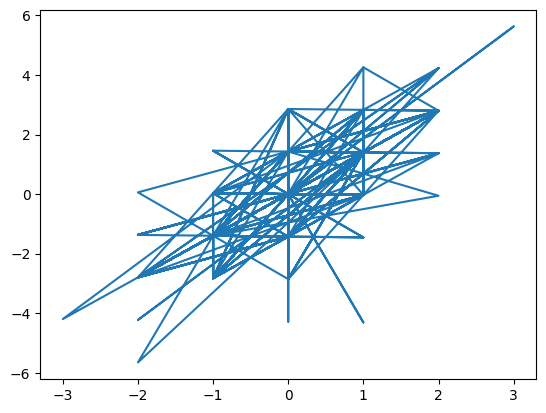

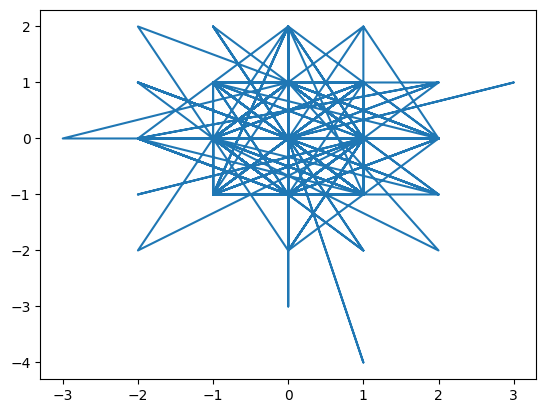

In [ ]:
#Plot
plt.plot( Z[0],Z[1])
plt.show()
plt.plot( X[0],X[1])
plt.show()

>now  check the correlation in generated samples with using np.correlate

In [ ]:
pprint.pprint(np.correlate(Z[0],Z[1]))
pprint.pprint(np.correlate(X[0],X[1]))

array([650.71714314])
array([-10])


## 5. Graphs (bonus)

I suggest running this question's code cells in google colab to install the $\textbf{PyGSP}$ package by  simply running the following code cell

In [ ]:
!pip install pygsp


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



<!-- ![]( graph.png) -->
<div style="text-align:center">
    <img src="graph.png" alt="Image" />
</div> 


For the directed graph above the adjacency matrix is : 
$
A = \begin{bmatrix}
    0  & 1  & 1 & 0\\
    -1  & 0  & 1 & 1 \\
    -1 & -1 & 0 & 1 \\
    0  & -1  & -1 & 0
\end{bmatrix}
$ 

If we change the nodes numbering, the properties of the graph don't change yet the adjacency matrix changes. 


In [ ]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt
from pygsp import graphs, filters, plotting
import cv2

ModuleNotFoundError: No module named 'cv2'


#### 5-1-  Introduction to graphs 
>construct the permutation matrix $\textbf{P}$ by modifying the Identity matrix. then use it to number the graph's nodes in reverse order

In [ ]:
# Code cell

A_modified = ...

In [ ]:
# Evaluation Cell
assert A_modified == np.matrix('0 -1 -1 0; 1 0 -1 -1; 1 1 0 -1; 0 1 1 0'), "wrong!"

#### 5-2-  Graph image processing  

Inpainting is a classical signal processing problem where we wish to fill in the missing values in a
partially observed signal. This is here done in the context of image processing for inferring missing pixel values in
an image. The signal in the image is considered to be the image matrix flattened while the image is modeled as a 2D grid graph.
Inpainting for an image can be formulated as below:

$$(M + \alpha L)x = y$$

where y is a partially observed graph signal (with missing values being 0), and M is a diagonal matrix that satisfies:
 $$ M(i, i)=   \left\{
\begin{array}{ll}
      1, & if & y(i) & is & observed, \\
      0, & if & y(i) & is & not & observed, \\
\end{array} 
\right.  $$

The Equation tries to find an x that nearly matches the observed values in y, and at the same time
being smooth on the graph (the image here). The regularisation parameter α controls the trade-off between the data fidelity term and the
smoothness prior. The solution can therefore be considered as an inpainted version of the partially observed signal.

>Use the cv2 package to load a grayscale version of the cameraman image with a relatively low resolution, 64 by 64, then display the image using matplotlib.pyplot

- do not forget to convert RGB to gray to reduce the 3 color channels to one

In [ ]:
# Code cell

>Now flatten the image matrix to get the signal\
>Then, construct the diagonal matrix M which has its diagonal 0 except for $p = 50%$ of its elements that are randomly set to 1\
>At last, apply the observasion matrix M to the signal and construct y 

In [ ]:
# Code cell

In [ ]:
# do not edit this cell 
G = graphs.Grid2d(64,64)
L = G.L

NameError: name 'graphs' is not defined

>To get x, apply the $\textbf{Cholesky decomposition}$ to ( $M+\alpha L$ ) and then solve the stated equation applying np.linalg.inv() to the two terms multiplied by x ( note that L is given by the code cell above )
- check the soloution with "np.linalg.solve()"

In [ ]:
# Code cell

>For values of alpha 0.001 , 0.1 , 10 and p values 50 , 75 display the original, the damaged and the Inpainted image in subplots

In [ ]:
# Code cell